<a href="https://colab.research.google.com/github/Pablocodes1993/finalproject/blob/main/RFM_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARY IMPORTATION

In [1]:
#Library Importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from datetime import timedelta
from sklearn.impute import KNNImputer

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, silhouette_samples



%matplotlib inline

# CLEANED DATASET IMPORTATION

In [44]:
# CLEANED DATASET WITH MISSING VALUE IMPUTATION
olist_df1= 'https://drive.google.com/file/d/1Lyj38pGQdtOhtF0azUnA6fL1NycUqNak/view?usp=share_link'
olist_df1 = 'https://drive.google.com/uc?export=download&id='+olist_df1.split('/')[-2]
olist_df1= pd.read_csv(olist_df1)

# CLEANED DATASET DROPPING ALL THE MISSING VALUES
olist_df2= 'https://drive.google.com/file/d/1piGjUdrfnATRIT9dJ_C2nglnd2qXApuY/view?usp=share_link'
olist_df2 = 'https://drive.google.com/uc?export=download&id='+olist_df2.split('/')[-2]
olist_df2= pd.read_csv(olist_df2)

# RFM ANALYSIS

In [45]:


# Convert 'order_purchase_timestamp' to datetime type
olist_df2['order_purchase_timestamp'] = pd.to_datetime(olist_df2['order_purchase_timestamp'])

# Set the date for analysis
current_date = olist_df2['order_purchase_timestamp'].max() + pd.DateOffset(days=1)
print(current_date)


2018-08-30 15:00:37


In [91]:
#Recency calculation df
sorted_recency_df = olist_df2.sort_values('order_purchase_timestamp', ascending=False)
recency_df = sorted_recency_df.loc[:, ['order_purchase_timestamp', 'customer_unique_id']]
recency_df = olist_df2.groupby('customer_unique_id').apply(lambda x: pd.Series({
   'order_purchase_timestamp': x['order_purchase_timestamp'].max(), 
    'Recency': (current_date - x['order_purchase_timestamp'].max()).days
    
})).reset_index()

#Sort the recency column
#recency_df  = recency_df.sort_values('Recency', ascending=False)


recency_df




,customer_unique_id,order_purchase_timestamp,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,115
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,537
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,321
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,288
...,...,...,...
91454,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,447
91455,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,262
91456,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,568
91457,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,119


In [87]:
#Frequency calculation df
#frequency_df = pd.DataFrame( olist_df2.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index())
#frequency_df.rename(columns={"order_id":"Frequency"}, inplace=True)
#frequency_df

frequency_df=olist_df2.groupby('customer_unique_id')['product_id'].size().reset_index(name='Frequency')
#Sort the recency column
frequency_df  = frequency_df.sort_values('Frequency', ascending=False)

frequency_df

,customer_unique_id,Frequency
55227,9a736b248f67d166d2fbb006bcb877c3,75
39998,6fbc7cdadbb522125f4b27ae9dee4060,38
89266,f9ae226291893fda10af7965268fb7f6,35
31030,569aa12b73b5f7edeaa6f2a01603e381,26
77795,d97b3cfb22b0d6b25ac9ed4e9c2d481b,24
...,...,...
32866,5b96a6a7d5de5738179accb10c9af8aa,1
32865,5b9603bf6b5ba113060bd41f770c725e,1
32864,5b95dc419c1284aef08693d3ea32da8d,1
32861,5b93d204e1d3130dd6ede5da588c0bcb,1


In [48]:
#Monetary Calculation df
monetary_df=olist_df2.groupby('customer_unique_id')['payment_value'].sum().reset_index(name='Monetary')
#Sort the recency column
monetary_df  = monetary_df.sort_values('Monetary', ascending=False)

monetary_df


,customer_unique_id,Monetary
3656,0a0a92112bd4c708ca5fde585afaa872,109312.64
70133,c402f431464c72e27330a67f7b94d4fb,44048.00
22940,4007669dec559734d6f53e029e360987,36489.24
85685,ef8d54b3797ea4db1d63f0ced6a906e9,30186.00
42292,763c8b1c9c68a0229c42c9fc6f662b93,29099.52
...,...,...
39873,6f5b9d1cdccc4d28f0483a612edecacf,11.63
14509,2878e5b88167faab17d4fb83a986d38b,11.63
64151,b33336f46234b24a613ad9064d13106d,10.89
67646,bd06ce0e06ad77a7f681f1a4960a3cc6,10.07


In [49]:
monetary_df.count()

customer_unique_id    91459
Monetary              91459
dtype: int64

In [92]:
#Datasets merging process with key variables
RFM_df= pd.merge(recency_df, frequency_df, on="customer_unique_id", how='inner')
RFM_df= RFM_df.merge(monetary_df, on="customer_unique_id", how='inner')
RFM_df.describe()



,Recency,Frequency,Monetary
count,91459.000000,91459.000000,91459.000000
mean,237.069769,1.237560,212.316635
std,152.546629,0.844406,631.329419
min,1.000000,1.000000,9.590000
25%,114.000000,1.000000,63.850000
50%,218.000000,1.000000,112.840000
75%,345.000000,1.000000,202.760000
max,695.000000,75.000000,109312.640000


In [51]:
quantiles = RFM_df.quantile(q=[0.20,0.40,0.6,0.8])
quantiles

<ipython-input-51-6be447f750db>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = RFM_df.quantile(q=[0.20,0.40,0.6,0.8])


,Recency,Frequency,Monetary
0.2,91.0,1.0,56.01
0.4,176.0,1.0,89.67
0.6,268.0,1.0,139.98
0.8,381.0,1.0,238.32


In [52]:
# Compute quantiles for each feature
quantiles = RFM_df.quantile(q=[0.2, 0.4, 0.6, 0.8])

# Assign quartile labels for each feature using apply() method
RFM_Segment = RFM_df.copy()
RFM_Segment['R_Quartile'] = RFM_Segment['Recency'].apply(lambda x: sum(x <= quantiles['Recency'].values) + 1)
RFM_Segment['F_Quartile'] = RFM_Segment['Frequency'].apply(lambda x: sum(x <= quantiles['Frequency'].values) + 1)
RFM_Segment['M_Quartile'] = RFM_Segment['Monetary'].apply(lambda x: sum(x <= quantiles['Monetary'].values) + 1)

# Concatenate the quartile labels to form the RFMClass label
RFM_Segment['RFMClass'] = RFM_Segment['R_Quartile'].map(str) \
                            + RFM_Segment['F_Quartile'].map(str) \
                            + RFM_Segment['M_Quartile'].map(str)


<ipython-input-52-4b6048315392>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = RFM_df.quantile(q=[0.2, 0.4, 0.6, 0.8])


In [53]:
RFM_df['customer_unique_id'].nunique()



91459

In [19]:
RFM_df.describe()

,Recency,Frequency,Monetary
count,91459.000000,91459.000000,91459.000000
mean,237.069769,1.032867,212.316635
std,152.546629,0.206215,631.329419
min,1.000000,1.000000,9.590000
25%,114.000000,1.000000,63.850000
50%,218.000000,1.000000,112.840000
75%,345.000000,1.000000,202.760000
max,695.000000,14.000000,109312.640000


In [20]:
RFM_Segment

,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,112,1,141.90,4,5,2,452
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,115,1,27.19,4,5,5,455
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,537,1,86.22,1,5,4,154
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,321,1,43.62,2,5,5,255
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,288,1,196.89,2,5,2,252
...,...,...,...,...,...,...,...,...,...
91454,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,447,1,4134.84,1,5,1,151
91455,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,262,1,84.58,3,5,4,354
91456,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,568,1,112.46,1,5,3,153
91457,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,119,1,133.69,4,5,3,453


In [21]:
RFM_Segment['RFMClass'].value_counts()

355    3868
254    3850
155    3791
154    3720
552    3705
353    3658
553    3644
453    3638
555    3627
452    3600
354    3561
455    3550
554    3524
352    3521
251    3519
153    3518
253    3512
454    3498
152    3472
451    3439
255    3436
151    3308
551    3301
252    3273
351    3220
511     342
311     340
411     312
211     290
111     218
312     159
512     158
412     136
212     135
112     118
513      75
213      74
413      72
313      67
113      48
414      31
114      30
214      29
514      26
314      22
115       8
415       7
315       3
215       3
515       3
Name: RFMClass, dtype: int64

Descriptive statistics for Recency:
count    91459.000000
mean       237.069769
std        152.546629
min          1.000000
25%        114.000000
50%        218.000000
75%        345.000000
max        695.000000
Name: Recency, dtype: float64

Skewness value for Recency:
0.45

Descriptive statistics for Frequency:
count    91459.000000
mean         1.237560
std          0.844406
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         75.000000
Name: Frequency, dtype: float64

Skewness value for Frequency:
15.91

Descriptive statistics for Monetary:
count     91459.000000
mean        212.316635
std         631.329419
min           9.590000
25%          63.850000
50%         112.840000
75%         202.760000
max      109312.640000
Name: Monetary, dtype: float64

Skewness value for Monetary:
71.64



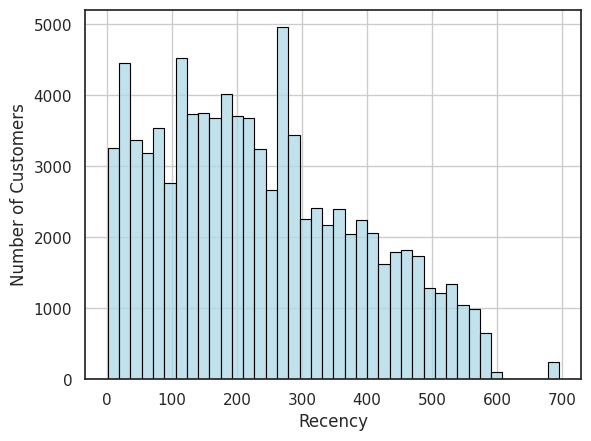

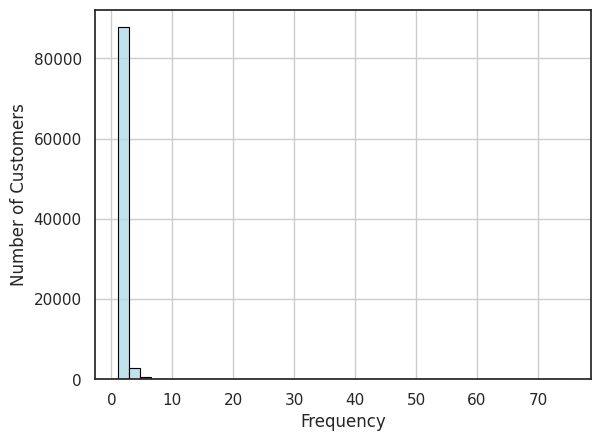

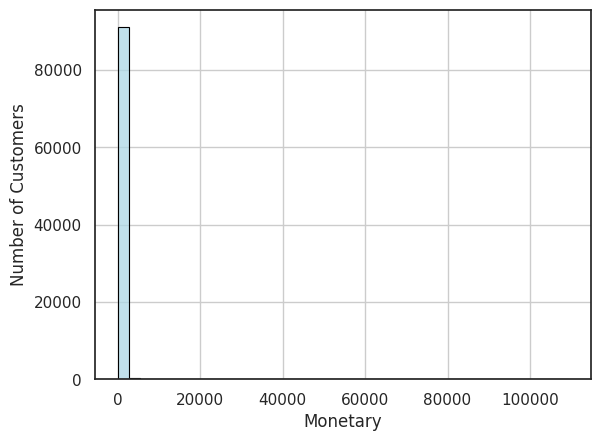

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have an RFM DataFrame named 'RFM_df' with columns 'Recency', 'Frequency', 'Monetary'
# Replace 'RFM_df' with your actual DataFrame containing RFM data
rfm_data = RFM_df

# Perform univariate analysis for each RFM metric
for metric in ['Recency', 'Frequency', 'Monetary']:
    # Calculate descriptive statistics
    statistics = rfm_data[metric].describe()
    print(f"Descriptive statistics for {metric}:\n{statistics}\n")
    
    # Create a histogram with distribution line
    plt.figure()
    sns.histplot(data=rfm_data, x=metric, bins=40, color='lightblue', edgecolor='black')
    plt.xlabel(metric)
    plt.ylabel('Number of Customers')
    plt.grid(True)  # Add grid
    
    # Calculate skewness
    skewness = np.round(rfm_data[metric].skew(), 2)
    print(f"Skewness value for {metric}:\n{skewness}\n")
    
   


Descriptive statistics for Recency:
count    91459.000000
mean       237.069769
std        152.546629
min          1.000000
25%        114.000000
50%        218.000000
75%        345.000000
max        695.000000
Name: Recency, dtype: float64

Skewness value for Recency:
0.45

Descriptive statistics for Frequency:
count    91459.000000
mean         1.032867
std          0.206215
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         14.000000
Name: Frequency, dtype: float64

Skewness value for Frequency:
10.66

Descriptive statistics for Monetary:
count     91459.000000
mean        212.316635
std         631.329419
min           9.590000
25%          63.850000
50%         112.840000
75%         202.760000
max      109312.640000
Name: Monetary, dtype: float64

Skewness value for Monetary:
71.64



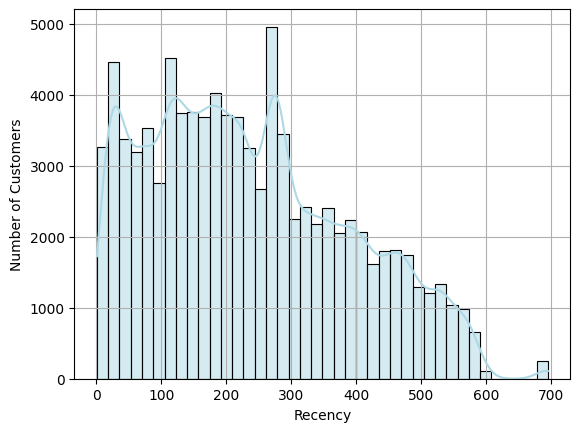

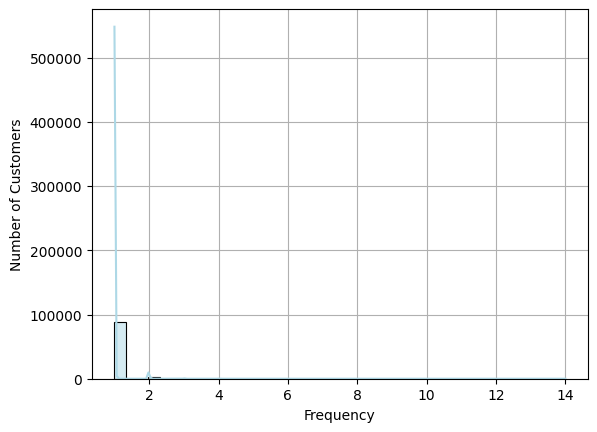

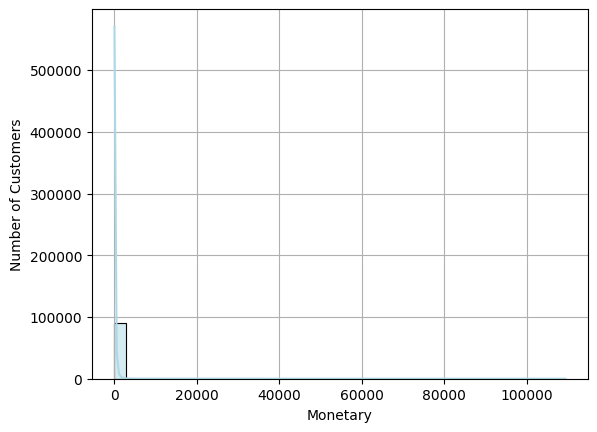

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have an RFM DataFrame named 'RFM_df' with columns 'Recency', 'Frequency', 'Monetary'
# Replace 'RFM_df' with your actual DataFrame containing RFM data
rfm_data = RFM_df

# Perform univariate analysis for each RFM metric
for metric in ['Recency', 'Frequency', 'Monetary']:
    # Calculate descriptive statistics
    statistics = rfm_data[metric].describe()
    print(f"Descriptive statistics for {metric}:\n{statistics}\n")
    
    # Create a histogram with distribution line
    plt.figure()
    sns.histplot(data=rfm_data, x=metric, bins=40, color='lightblue', edgecolor='black', kde=True)
    plt.xlabel(metric)
    plt.ylabel('Number of Customers')
    plt.grid(True)  # Add grid
    
    # Calculate skewness
    skewness = np.round(rfm_data[metric].skew(), 2)
    print(f"Skewness value for {metric}:\n{skewness}\n")


<ipython-input-24-86eaf08a2804>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(RFM_df['Recency'])
<ipython-input-24-86eaf08a2804>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(RFM_df['Frequency'])
<ipython-input-24-86eaf08a2804>:4: UserWarning: 



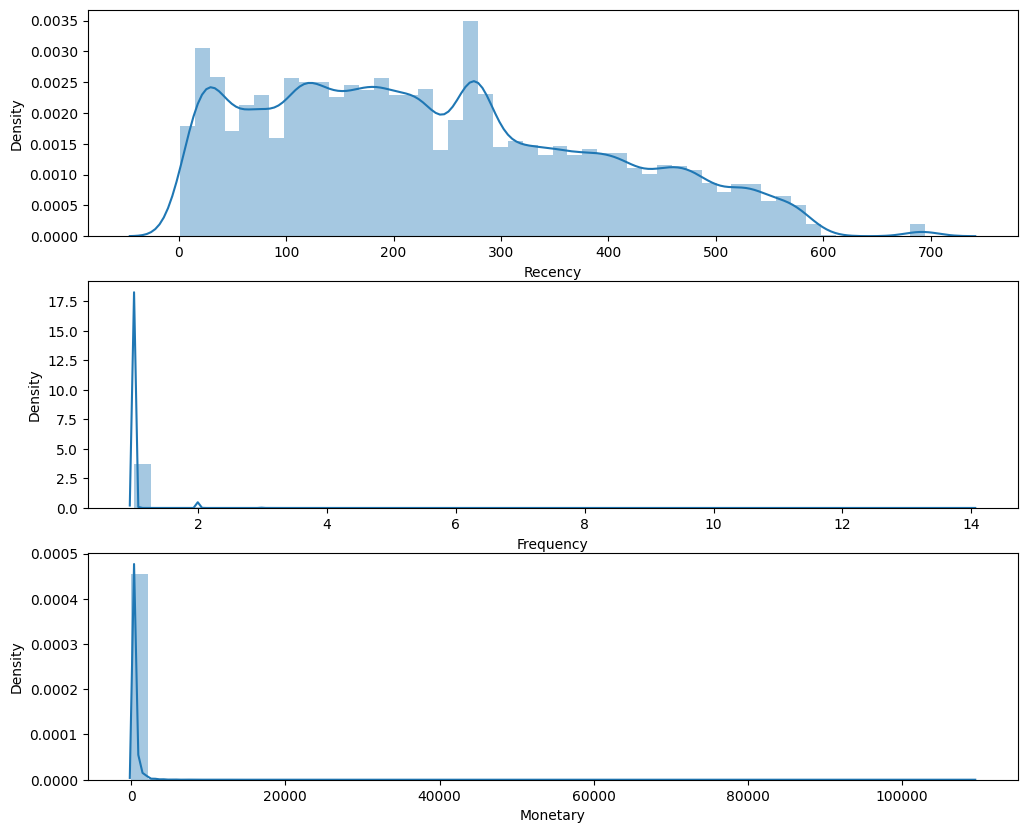

In [24]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(RFM_df['Recency'])
plt.subplot(3, 1, 2); sns.distplot(RFM_df['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(RFM_df['Monetary'])
plt.show()

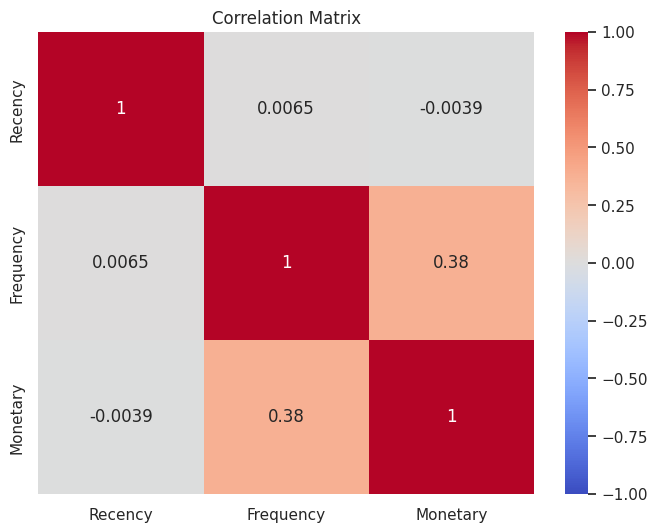

In [94]:
correlation_matrix = RFM_df[['Recency', 'Frequency', 'Monetary']].corr()


# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

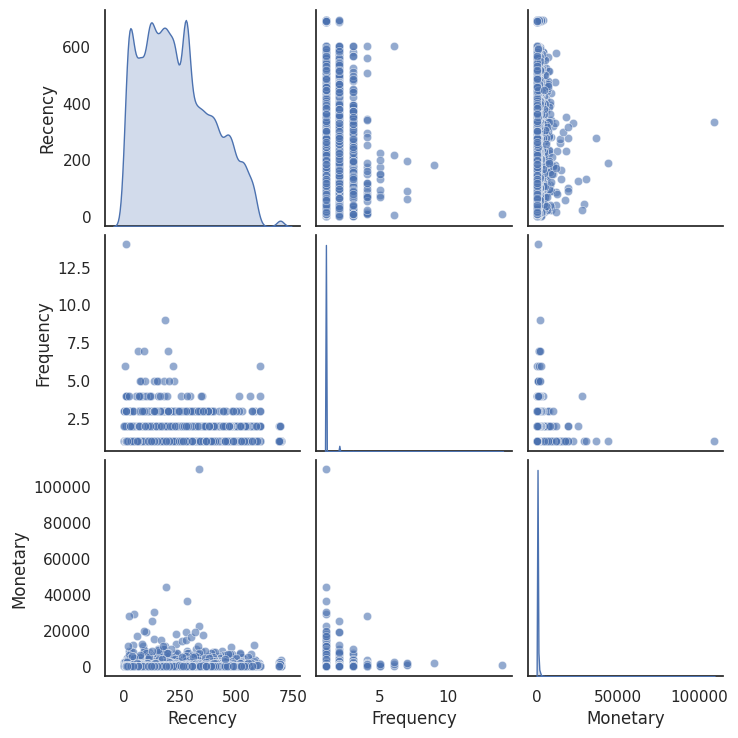

In [27]:

# Assuming you have an RFM DataFrame named 'RFM_df' with columns 'Recency', 'Frequency', 'Monetary'
# Replace 'RFM_df' with your actual DataFrame containing RFM data

# Calculate the correlation matrix
correlation_matrix = RFM_df[['Recency', 'Frequency', 'Monetary']].corr()

# Plot the correlogram
sns.set(style='white')
sns.pairplot(RFM_df[['Recency', 'Frequency', 'Monetary']], diag_kind='kde', plot_kws={'alpha': 0.6})

plt.show()


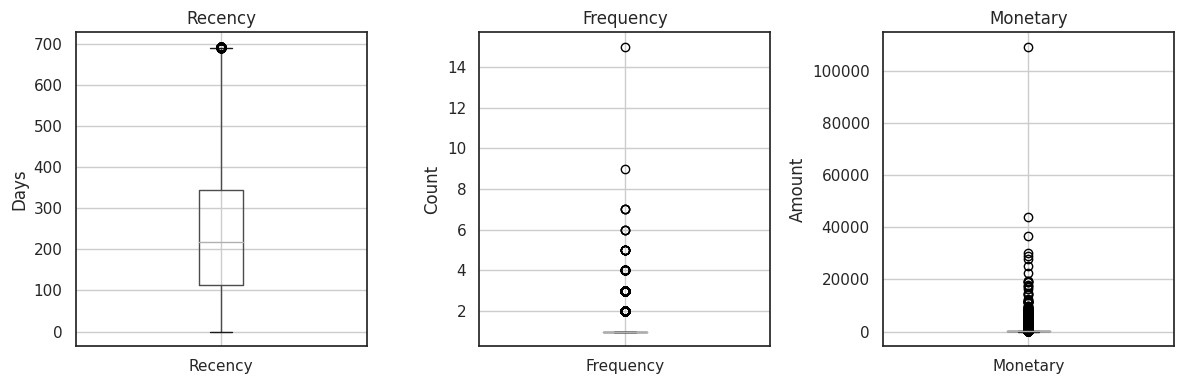

In [84]:
# with columns 'Recency', 'Frequency', and 'MonetaryValue'

# Create a figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot box plots for each variable
RFM_df.boxplot(column='Recency', ax=axes[0])
axes[0].set_title('Recency')
axes[0].set_ylabel('Days')

rfm_data.boxplot(column='Frequency', ax=axes[1])
axes[1].set_title('Frequency')
axes[1].set_ylabel('Count')

rfm_data.boxplot(column='Monetary', ax=axes[2])
axes[2].set_title('Monetary')
axes[2].set_ylabel('Amount')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()



In [60]:
from scipy.stats import shapiro

# Assuming you have the RFM data in a pandas DataFrame called 'rfm_data'
# with a column 'Recency'

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(rfm_data['Recency'])

# Print the test results
print('Shapiro-Wilk Test - Recency')
print('Test Statistic:', statistic)
print('p-value:', p_value)

# Interpret the test results
alpha = 0.05  # Set the significance level
if p_value > alpha:
    print('The Recency variable follows a normal distribution.')
else:
    print('The Recency variable does not follow a normal distribution.')


Shapiro-Wilk Test - Recency
Test Statistic: 0.9609358906745911
p-value: 0.0
The Recency variable does not follow a normal distribution.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [65]:
RFM_df

,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,115,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,288,1,196.89
...,...,...,...,...,...
91454,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,447,2,4134.84
91455,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,262,1,84.58
91456,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,568,1,112.46
91457,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,119,1,133.69


In [73]:
import pandas as pd

# Assuming you have an RFM DataFrame with columns 'customer_id', 'recency', 'frequency', 'monetary', and 'order_date'
rfm_df = RFM_df

# Convert 'order_date' column to datetime type
rfm_df['order_purchase_timestamp'] = pd.to_datetime(rfm_df['order_purchase_timestamp'])

# Calculate the reference date for analysis
reference_date = rfm_df['order_purchase_timestamp'].max()

# Calculate recency, frequency, and monetary values relative to the reference date
rfm_df['Recency'] = (reference_date - rfm_df['order_purchase_timestamp']).dt.days
rfm_df['Frequency'] = rfm_df['Frequency']
rfm_df['Monetary'] = rfm_df['Monetary']

# Perform RFM analysis over time
rfm_over_time = rfm_df.groupby('order_purchase_timestamp').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print(rfm_over_time)


      order_purchase_timestamp  Recency  Frequency  Monetary
0          2016-10-03 16:56:50    694.0        1.0     39.09
1          2016-10-03 21:13:36    694.0        1.0     53.73
2          2016-10-03 22:06:03    694.0        1.0    133.46
3          2016-10-03 22:31:31    694.0        1.0     40.95
4          2016-10-03 22:44:10    694.0        1.0    154.57
...                        ...      ...        ...       ...
91222      2018-08-29 12:25:59      0.0        1.0     73.10
91223      2018-08-29 14:18:23      0.0        2.0   1021.92
91224      2018-08-29 14:18:28      0.0        1.0     61.29
91225      2018-08-29 14:52:00      0.0        1.0     33.23
91226      2018-08-29 15:00:37      0.0        1.0     93.75

[91227 rows x 4 columns]


In [64]:
RFM_df

,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,115,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,288,1,196.89
...,...,...,...,...,...
91454,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,447,2,4134.84
91455,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,262,1,84.58
91456,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,568,1,112.46
91457,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,119,1,133.69


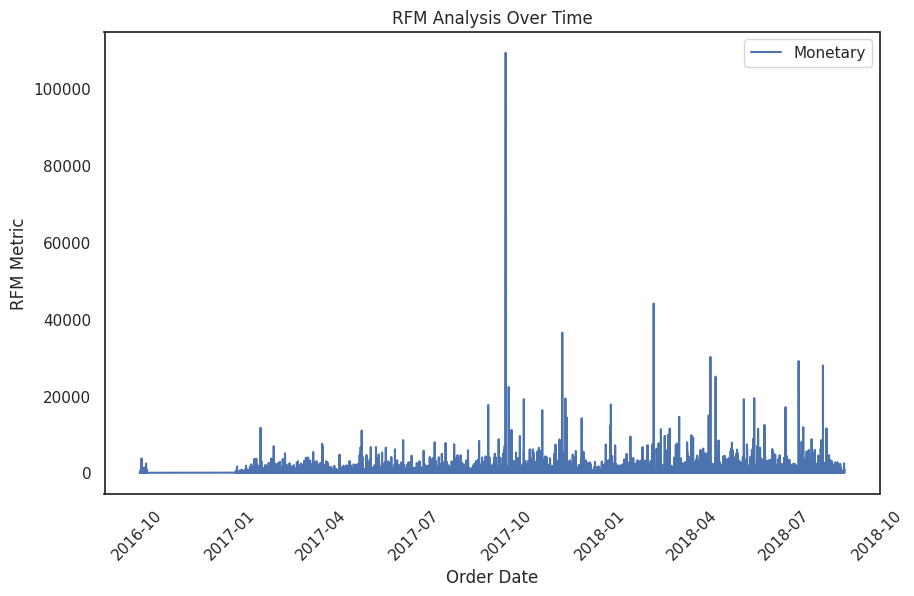

In [83]:
# Assuming you have the rfm_over_time DataFrame containing the average RFM metrics over time

# Convert 'order_date' column to datetime type (if not already done)
rfm_over_time['order_purchase_timestamp'] = pd.to_datetime(rfm_over_time['order_purchase_timestamp'])

# Plotting the results
plt.figure(figsize=(10, 6))
#plt.plot(rfm_over_time['order_purchase_timestamp'], rfm_over_time['Recency'], label='Recency')
#plt.plot(rfm_over_time['order_purchase_timestamp'], rfm_over_time['Frequency'], label='Frequency')
plt.plot(rfm_over_time['order_purchase_timestamp'], rfm_over_time['Monetary'], label='Monetary')
plt.xlabel('Order Date')
plt.ylabel('RFM Metric')
plt.title('RFM Analysis Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [81]:
# Select specific columns and store them in another DataFrame
selected_columns_rfm = RFM_df[['Recency','Frequency','Monetary']]
selected_columns_rfm.describe()

,Recency,Frequency,Monetary
count,91459.000000,91459.000000,91459.000000
mean,236.069769,1.237560,212.316635
std,152.546629,0.844406,631.329419
min,0.000000,1.000000,9.590000
25%,113.000000,1.000000,63.850000
50%,217.000000,1.000000,112.840000
75%,344.000000,1.000000,202.760000
max,694.000000,75.000000,109312.640000


LOG TRANSFORMATION

In [96]:
RFM_log_trans=selected_columns_rfm.copy()
RFM_log_trans['Frequency'] = np.log10(RFM_log_trans['Frequency'])
RFM_log_trans['Monetary'] = np.log10(RFM_log_trans['Monetary'])


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
